# Plant Seedlings Classification

## Objective

### To create a classifier capable of determining a plant's species from a photo.

In [39]:
# Importing libraries

import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sb
import os
import PIL
from PIL import Image
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import tensorflow
import tensorflow_datasets as tfds

import pathlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.utils import to_categorical

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing dataset

data_dir = pathlib.Path('C:/Users/William/train/')
dataset = data_dir.glob('*/*.png')

In [3]:
image_count = len(list(dataset))
image_count

4750

In [4]:
# Black-grass

black_grass = list(data_dir.glob('Black-grass/*'))
#Image.open(str(black_grass[0]))

In [5]:
# Charlock

charlock = list(data_dir.glob('Charlock/*'))
#Image.open(str(charlock[0]))

In [6]:
# Cleavers

cleavers = list(data_dir.glob('Cleavers/*'))
#Image.open(str(cleavers[0]))

In [7]:
# Common chickweed

chickweed = list(data_dir.glob('Common Chickweed/*'))
#Image.open(str(chickweed[0]))

In [8]:
# Common wheat

wheat = list(data_dir.glob('Common wheat/*'))
#Image.open(str(wheat[0]))

In [9]:
# Fat Hen

fat_hen = list(data_dir.glob('Fat Hen/*'))
#Image.open(str(fat_hen[0]))

In [10]:
# Loose silky-bent

silky_bent = list(data_dir.glob('Loose Silky-bent/*'))
#Image.open(str(silky_bent[0]))

In [11]:
# Maize

maize = list(data_dir.glob('Maize/*'))
#Image.open(str(maize[0]))

In [12]:
# Scentless mayweed

mayweed = list(data_dir.glob('Scentless Mayweed/*'))
#Image.open(str(mayweed[0]))

In [13]:
# Shepherd's purse

shepherd = list(data_dir.glob('Shepherds Purse/*'))
#Image.open(str(shepherd[0]))

In [14]:
# Small-flowered cranesbill

cranesbill = list(data_dir.glob('Small-flowered Cranesbill/*'))
#Image.open(str(cranesbill[0]))

In [15]:
# Sugar beet

sugar_beet = list(data_dir.glob('Sugar Beet/*'))
#Image.open(str(sugar_beet[0]))

In [16]:
# Converting images into numpy arrays, greyscaling, and gaussian blurring

data = []
labels = []

for i in black_grass:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(0)
    
for i in charlock:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(1)
    
for i in cleavers:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(2)
    
for i in chickweed:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(3)
    
for i in wheat:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(4)
    
for i in fat_hen:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(5)
    
for i in silky_bent:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(6)
    
for i in maize:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(7)
    
for i in mayweed:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(8)
    
for i in shepherd:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(9)

for i in cranesbill:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(10)
    
for i in sugar_beet:
    image = load_img(i, color_mode='rgb', target_size=(256, 256))
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    data.append(image)
    labels.append(11)

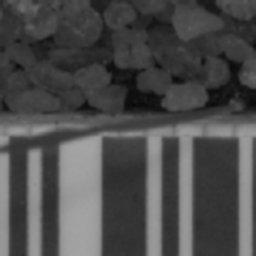

In [17]:
# Visualize data after pre-processing

Image.fromarray(data[0])

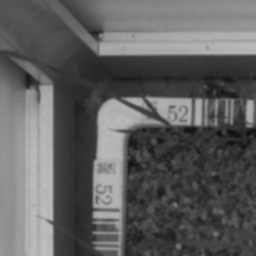

In [18]:
Image.fromarray(data[50])

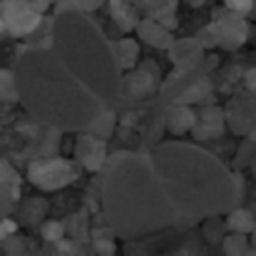

In [19]:
Image.fromarray(data[300])

In [20]:
data = np.array(data)
labels = np.array(labels)

In [213]:
# Train/valid/test split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [214]:
# Checking shape of data

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1662, 256, 256) (1662,)
(1663, 256, 256) (1663,)
(1425, 256, 256) (1425,)


In [215]:
# Reshaping train/val/test for compatibility with Keras model

X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 1)

In [216]:
# Normalizing X_train

X_train = X_train.astype('float32') / 255

In [217]:
# Checking to see if normalization worked

X_train.min(), X_train.max()

(0.003921569, 1.0)

In [218]:
# Normalizing X_val

X_val = X_val.astype('float32') / 255

In [219]:
# Normalizing X_test

X_test = X_test.astype('float32') / 255

In [220]:
# Converting labels into one-hot-vectors
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [221]:
y_train, y_val, y_test

(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [222]:
y_train.shape, y_val.shape, y_test.shape

((1662, 12), (1663, 12), (1425, 12))

In [223]:
# Printing label for y_train[0]

y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [32]:
# Creating model

num_classes = 12

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [33]:
# Compiling model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [35]:
# Training model

epochs = 5

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)

Epoch 1/5
52/52 [==============================] - ETA: 4:40 - loss: 2.4915 - accuracy: 0.06 - ETA: 1:40 - loss: 2.5666 - accuracy: 0.06 - ETA: 1:42 - loss: 2.5788 - accuracy: 0.06 - ETA: 1:40 - loss: 2.5739 - accuracy: 0.07 - ETA: 1:38 - loss: 2.5672 - accuracy: 0.08 - ETA: 1:37 - loss: 2.5607 - accuracy: 0.08 - ETA: 1:35 - loss: 2.5551 - accuracy: 0.09 - ETA: 1:35 - loss: 2.5502 - accuracy: 0.09 - ETA: 1:33 - loss: 2.5462 - accuracy: 0.09 - ETA: 1:32 - loss: 2.5427 - accuracy: 0.09 - ETA: 1:30 - loss: 2.5394 - accuracy: 0.09 - ETA: 1:29 - loss: 2.5365 - accuracy: 0.10 - ETA: 1:27 - loss: 2.5337 - accuracy: 0.10 - ETA: 1:25 - loss: 2.5310 - accuracy: 0.10 - ETA: 1:23 - loss: 2.5286 - accuracy: 0.10 - ETA: 1:21 - loss: 2.5264 - accuracy: 0.10 - ETA: 1:20 - loss: 2.5246 - accuracy: 0.10 - ETA: 1:18 - loss: 2.5230 - accuracy: 0.10 - ETA: 1:16 - loss: 2.5216 - accuracy: 0.10 - ETA: 1:14 - loss: 2.5203 - accuracy: 0.10 - ETA: 1:12 - loss: 2.5190 - accuracy: 0.10 - ETA: 1:10 - loss: 2.5179 

In [36]:
# Evaluate the model and print confusion matrix

model.evaluate(X_test, y_test)

45/45 [==============================] - ETA: 48s - loss: 2.2058 - accuracy: 0.187 - ETA: 43s - loss: 2.2146 - accuracy: 0.234 - ETA: 42s - loss: 2.2573 - accuracy: 0.229 - ETA: 42s - loss: 2.2156 - accuracy: 0.234 - ETA: 40s - loss: 2.2851 - accuracy: 0.225 - ETA: 39s - loss: 2.2990 - accuracy: 0.213 - ETA: 38s - loss: 2.3138 - accuracy: 0.192 - ETA: 37s - loss: 2.3206 - accuracy: 0.187 - ETA: 36s - loss: 2.3190 - accuracy: 0.191 - ETA: 35s - loss: 2.3225 - accuracy: 0.184 - ETA: 34s - loss: 2.3210 - accuracy: 0.179 - ETA: 33s - loss: 2.3124 - accuracy: 0.174 - ETA: 32s - loss: 2.3232 - accuracy: 0.170 - ETA: 31s - loss: 2.3352 - accuracy: 0.176 - ETA: 30s - loss: 2.3379 - accuracy: 0.175 - ETA: 29s - loss: 2.3241 - accuracy: 0.175 - ETA: 28s - loss: 2.3307 - accuracy: 0.178 - ETA: 27s - loss: 2.3254 - accuracy: 0.182 - ETA: 26s - loss: 2.3200 - accuracy: 0.177 - ETA: 25s - loss: 2.3112 - accuracy: 0.179 - ETA: 24s - loss: 2.2976 - accuracy: 0.180 - ETA: 23s - loss: 2.2945 - accuracy:

[2.315112352371216, 0.1880701780319214]

<AxesSubplot:>

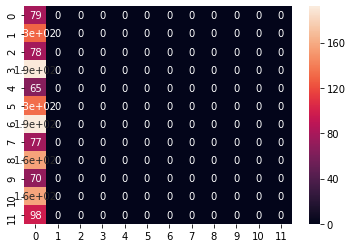

In [225]:
y_pred = model.predict(X_test)

round_predicts = np.argmax(y_pred, axis=1)

#for i in round_predicts:
    #print(i)
    
le = LabelEncoder()

round_predicts = le.fit_transform(round_predicts)



y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, round_predicts)

sb.heatmap(cm, annot=True)

In [61]:
# Visualize predictions

y_pred_2 = np.argmax(model.predict(X_test[2].reshape(1, 256, 256, 1)))
y_pred_3 = np.argmax(model.predict(X_test[3].reshape(1, 256, 256, 1)))
y_pred_33 = np.argmax(model.predict(X_test[33].reshape(1, 256, 256, 1)))
y_pred_36 = np.argmax(model.predict(X_test[36].reshape(1, 256, 256, 1)))
y_pred_59 = np.argmax(model.predict(X_test[59].reshape(1, 256, 256, 1)))

In [59]:
print("Prediction for X_test[2]: ", y_pred_2)

Prediction for X_test[2]:  8


In [62]:
print("Prediction for X_test[3]: ", y_pred_3)

Prediction for X_test[3]:  6


In [63]:
print("Prediction for X_test[33]: ", y_pred_33)

Prediction for X_test[33]:  3


In [64]:
print("Prediction for X_test[36]: ", y_pred_36)

Prediction for X_test[36]:  8


In [65]:
print("Prediction for X_test[59]: ", y_pred_59)

Prediction for X_test[59]:  3
